# Assigment 1 report: Graph Pathfinding with Genetic Algorithms
     
          
              
Favstina Krečič, Lea Križaj

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

kako sm si jaz zamislila: za vsak task je kratek opis taska, potem opis funkcij, parametrov, spremenljivk - ta pomembne reči, potem pa še sekcija z rezultati

## Task 1: Shortest path between 2 nodes

In the first task, our goal was to find the shortest path between two nodes in a directed graph. Firstly, we had to define some graphs, which we wrote by hand and saved as .txt files in folder 'graphs'. Each row defines two nodes and a weight of an edge between them. 

**Our proposed genoms:**    
Our gene space consists of all graph nodes except the start and end nodes, plus the value 0. This allows the GA to generate different sequences of nodes that represent a potential path. Each candidate solution is then passed to the fitness function pathLength, where it is preprocessed. During preprocessing, all zeros are removed (here zeros represent “no move,” equally to genom being one gene shorter, which allows us to simulate shorter paths), and all duplicate nodes are eliminated except for their first occurrence. The resulting sequence, path_real, is therefore a cleaned path that contains only graph nodes, with no duplicates, and with variable length.

### Functions:      
**read_graph(path)** is an additional function that accepts a path to .txt file, so a path to a graph and it prints the number of nodes **n** and a **graph** itself, and return those two. We use this same function in all 3 tasks in this assignment.     

**pathLength** - our fitness function. As mentioned before, the sequence it receives is first preprocessed, producing **path_real**. We then iterate over this cleaned path and check whether every consecutive pair of nodes is connected in the graph. If the connection exists, its weight is added to the total distance. If any connection is missing, the path is considered invalid and is penalized by returning a large negative value. Finally, valid paths return their total distance (a negative value, since the GA can only maximize).

### Results:   
We than used our fitness function to find the shortest distance between selected **start** and **end** nodes in a chosen graph, using Genetic Algorithm in pygad library. We tested it using different implementation parameters:


1. first we tried our algorithm on graphs of diferent sizes and observed its returned minimal path depending on diferent number of performed generations. We tried it with two small (n=4, n=6), medium (n=9, n=12) and large (n=15, N=20) sized graphs.     
      
Other parameters: number_parents_mating=5, solutions_per_pop=50

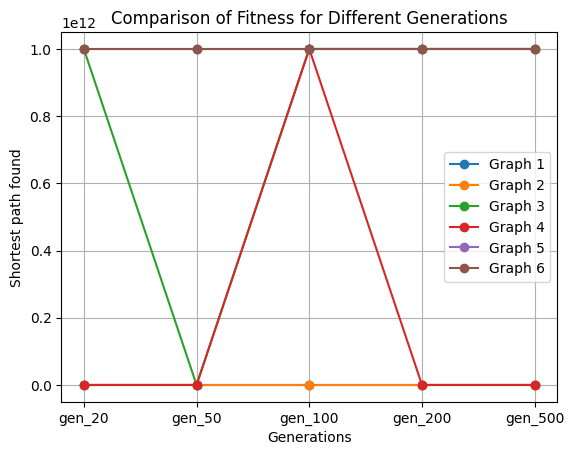

In [16]:
df = pd.read_csv("Task1/GenerationsResults.csv")

# transpose to get a function
df_transposed = df.T

for i, row in enumerate(df_transposed.columns):
    plt.plot(df_transposed.index, df_transposed[row], marker="o", label=f"Graph {i+1}")

plt.xlabel("Generations")
plt.ylabel("Shortest path found")
plt.title("Comparison of Fitness for Different Generations")
plt.grid(True)
plt.legend()

Small graphs (graph 1 and graph 2) are quick to find the shortest path, since there isn't many nodes, so the number of generations didn't have any impact on the soultions.       
         

Medium graphs (graph 3 and graph 4) sometimes find the shortest path very quickly, other times they don't. The number of generations doesn't seem to have a big impact on those, but we also have to note, that it heavily depends on how many edges a graph contains.        
       
               
Large graphs(graph 5 and graph 6) in this particular run did not find any solution, they mostly returned penalized solution no matter how many generations we ran them through.

2.  We than repeated the same process, but for diferent starting population sizes, using the same graphs as before.      
       
Othere parameters: number_generations=500, number_parents_mating=5

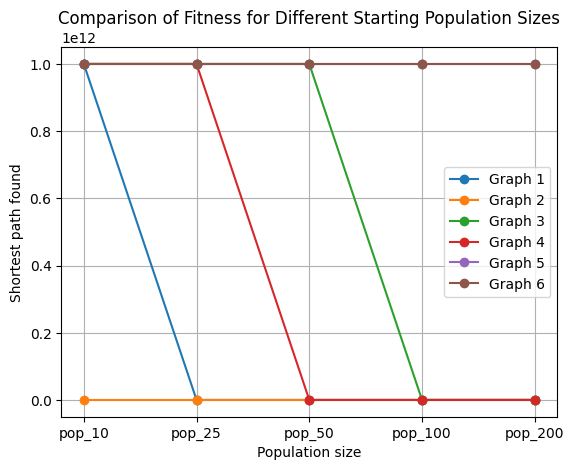

In [22]:
df = pd.read_csv("Task1/InitPopResults.csv")

# transpose to get a function
df_transposed = df.T

for i, row in enumerate(df_transposed.columns):
    plt.plot(df_transposed.index, df_transposed[row], marker="o", label=f"Graph {i+1}")

plt.xlabel("Population size")
plt.ylabel("Shortest path found")
plt.title("Comparison of Fitness for Different Starting Population Sizes")
plt.grid(True)
plt.legend()

Small graphs (graph 1 and graph 2) still found solutions even with smaller starting population size.      
         

Medium graphs (graph 3 and graph 4) work better with larger population sizes.     
       
               
For large graphs(graph 5 and graph 6) this range of pupulation size was not enough, neither of graphs found a solution.

3. Different mutation probabilities (on medium and large sized graphs). We used three graphs (n=9, n=12, n=20) to test whether the bigger mutation probability has a significant effect.      
    
Other parameters: number_generations=500, number_parents_mating=5 solutions_per_pop=150,

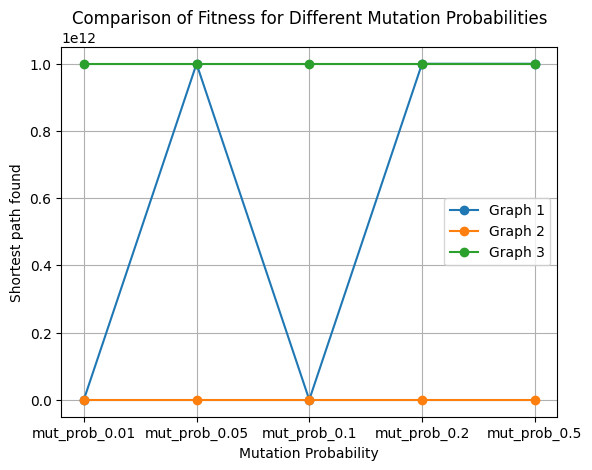

In [25]:
df = pd.read_csv("Task1/MutProbResults.csv")

# transpose to get a function
df_transposed = df.T

for i, row in enumerate(df_transposed.columns):
    plt.plot(df_transposed.index, df_transposed[row], marker="o", label=f"Graph {i+1}")

plt.xlabel("Mutation Probability")
plt.ylabel("Shortest path found")
plt.title("Comparison of Fitness for Different Mutation Probabilities")
plt.grid(True)
plt.legend()

Graph 1 (n=9) is a bit random, sometimes it found the solution, the other times it did not. Graph 2 found a solution no matter the mutation probability (note: graph 2 has more edges). Graph 3 (n=20) still hasn't found a solution, no matter the the mutation probability.

4. we also tried different crossover operators on graphs with different number of nodes (n=6, n=12, n=9).
       
Other parameters: number_generations=200, number_parents_mating=5 solutions_per_pop=100

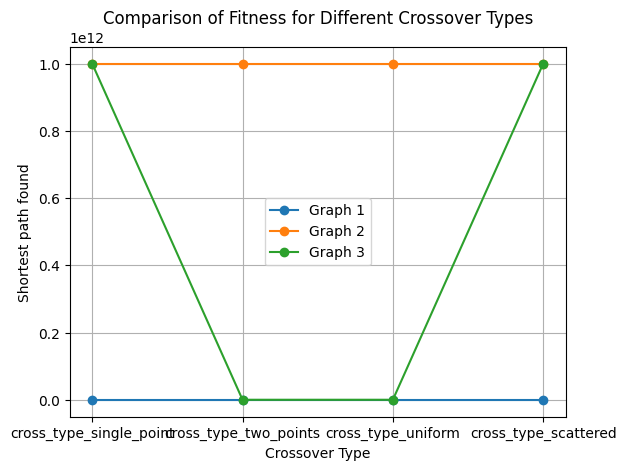

In [27]:
df = pd.read_csv("Task1/CrossTypeResults.csv")

# transpose to get a function
df_transposed = df.T

for i, row in enumerate(df_transposed.columns):
    plt.plot(df_transposed.index, df_transposed[row], marker="o", label=f"Graph {i+1}")

plt.xlabel("Crossover Type")
plt.ylabel("Shortest path found")
plt.title("Comparison of Fitness for Different Crossover Types")
plt.grid(True)
plt.legend()

Graph 1 (n=6) found the solutions no matter the crossover type, while graph 2 (n=9) found none. Graph 3 seems to have performed better with two points crossover and uniform crossover.

## Task 2: Shortest path between multiple nodes  

In the second task we are again looking for the shortest path, but without the start and end nodes. We are given a **sequence of nodes**, a subset of our graph, which our path should visit in the order they are given, and minimize the length of this path.

**Proposed genoms:**    
This time, the gene space again consists of all graph nodes plus the value zero (in case of an empty sequence). Since the path may need to revisit certain nodes in order to reach all sequence nodes in the required order, duplicate nodes are allowed and no preprocessing is performed in the fitness function, unlike in Task 1. We ensured that every genome contains the required sequence by implementing custom crossover and mutation operators. 


### Functions:      

**pathLength** - The function is similar to the fitness function in Task 1, except that it now also handles duplicate nodes and checks whether a required sequence is followed. Since duplicate genes are allowed, there is no preprocessing; we simply skip a gene if it is the same as the previous one. We maintain a counter that tracks our current position within the target sequence, and this counter increases when the current node matches the next required node in the sequence. If the counter reaches the end of the sequence (equals its length), then the correct path has been found and we return the total distance. Otherwise, the path is penalized as in the first task.     
          
          
**creating_init_pop** - This function creates an initial population, making sure that each genome it creates has a sequence built-in. In each genome it randomly decides on which indices it will put any node from gene_space, and then fills the rest of the indices with nodes from our sequence.     
        
**custom_crossover** - In custom_crossover, we randomly choose two parents and then iterate over them in search of possible crossover points. At each index we check whether the sequnce remains untouched and if it does, we add this index to possible crossover points. At the end we randomly choose one of those points and combine two parents accordingly. If there is no suitable crossover point, we just return the first parent.      
       
**custom_mutation** - Mutation function has a little different approach, instead of checking whether the sequence is preserved, we just iterate over the genes, and if two consecutives genes are not both in the sequence, we add that point to a list of possible swap points. At the end we randomly choose one such point and perform a swap between two genes.

### Results: 

1. Different numbers of generations (n=4, n=6, n=9, n=15):

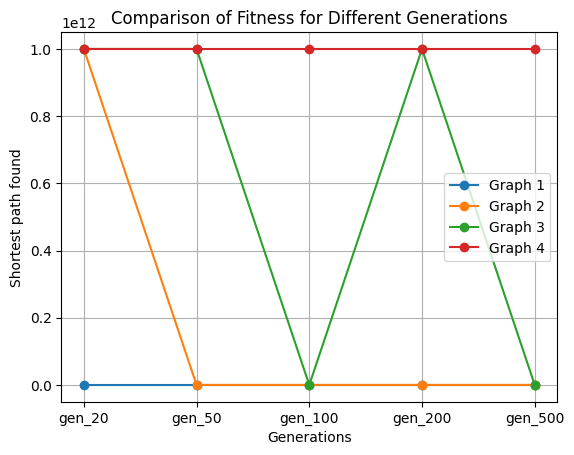

In [7]:
df = pd.read_csv("Task2/GenerationsResults.csv")

# transpose to get a function
df_transposed = df.T

for i, row in enumerate(df_transposed.columns):
    plt.plot(df_transposed.index, df_transposed[row], marker="o", label=f"Graph {i+1}")

plt.xlabel("Generations")
plt.ylabel("Shortest path found")
plt.title("Comparison of Fitness for Different Generations")
plt.grid(True)
plt.legend()

2. different initial population sizes (n=4, n=6, n=9, n=15):

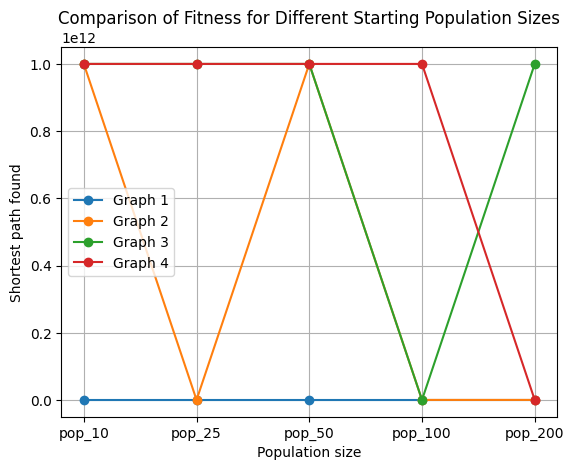

In [6]:
df = pd.read_csv("Task2/InitPopResults.csv")

# transpose to get a function
df_transposed = df.T

for i, row in enumerate(df_transposed.columns):
    plt.plot(df_transposed.index, df_transposed[row], marker="o", label=f"Graph {i+1}")

plt.xlabel("Population size")
plt.ylabel("Shortest path found")
plt.title("Comparison of Fitness for Different Starting Population Sizes")
plt.grid(True)
plt.legend()

## Task 3: Shortest path with multiple agents

In the third task we updated the algorithm from second task to work with multiple agents moving simultaneously. This time we don't return the shortest path, but the shortest time needed for all agents to complete their path and their paths. All of the agents have the same sequence they have to complete, alongside with some other restrictions.     
       
**Restrictions**: moving through an endge with distance d takes d time units; after moving, each agent waits at a node for an additional 10 time units; each node and edge on a graph can contain only one agent at a time; instead of moving, agents can wait at a node for 20 time units.

**Proposed genoms**:     
Genoms in the third task consist of a multiple smaller sections, so each agent has its own section of genome, which acts as its independent path. So essentially, each agents has its own genome. Similar to task 2, duplicates are allowed, and each sections contains the sequence needed for completing the path. To ensure that structure doesn't break, we implemented a custom crossover and mutation function.

### Functions:    
**pathLength** - In fitness function we firstly separate genome into agent sections. We keep track of how much time passed, the positions of each agent, wait time for each agent, whether an agent is moving or not, occupied nodes, agents that haven't finished the sequence, occupied edges and progress through the sequence for each agent. We prematurely return and penalize if the agents have the same starting node. In each time step we lower the waiting time for agents by one and iterate over agents whose wait time has reached zero. If agent is 'on the move' we first check whether the next node in its path is occupied - if it is we add waiting time of 20 time units. If it is not occupied, agent occupies it and adds 10 time units to its time and sets his moving to false. If the agent is not 'on the move' it checks whether it has reached the end, in that case we remove it from the unfinished agents. If that is not the case, we check if the agents finished its path prematurely without finishing the sequence, in which case we penalize it. If the agent hasn't reached the end, we check his next position, if its the same node, we just add waiting time - 20 time units. If they are not the same we check wether the edge to next is in occupied edges in which case we add waiting time. If the edge doesn't exists, we penalize. If the edge is not occupied, the agent occupies it and add its weight to its waiting time.      
      
**creating_init_pop** - This creates initial population the same way it did in task 2, with one exception. Each section begins with a different node, without breaking the sequence.    
      
**custom_crossover** - This crossover behaves similar to the one from task 2. It randomly chooses two parents and then for each section/agent checks the positions in section range. It checks those positions for whether they preserve the sequence and adds them to possible crossover points if they do. Then it randomly chooses one of those points and performs crossover for that section. If the section has no suitable crossover points, it just returns the section from the first parent. Function performs that for all of the agents and concatenates the sections into one genome.     
       
**custom_mutation** - Mutation function is quite different from before. Previously we iterated over genom in search of position, where we could swap two genes, but now we don't swap two genes, but we change a gene with random one of the nodes from gene space. We additionally check, whether a node that we will change has a connection to the next node in section, and if the previous node in the section has a connection to a changed node. If both conditions are met, we add an idex and the new node to possible swap points. At the end we randomly choose one item from possible swap points, and at said index we swap the old value with a new one. While checking for connection we make sure, that if there is no new node that would have connections to both previous and next node, we don't find ourlselves in an infinite loop. If the current node at position we are checking is in the sequence, we skip it.

### Results:      
For this task we used a bit bigger and denser graph (n=12) on which we performed some tests. We did not use bigger a bigger graph because its run time would have been too long.

1. Different number of agents. We used a short target path of 4 elements, number_generations=500, number_parents_mating=5, sol_per_pop=50

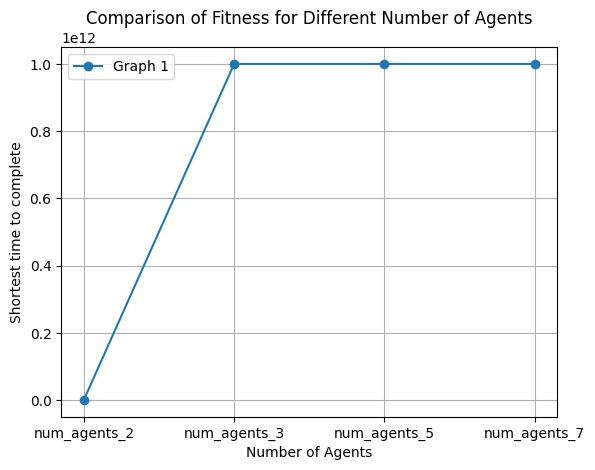

In [28]:
df = pd.read_csv("Task3/NumAgentsResults.csv")

# transpose to get a function
df_transposed = df.T

for i, row in enumerate(df_transposed.columns):
    plt.plot(df_transposed.index, df_transposed[row], marker="o", label=f"Graph {i+1}")

plt.xlabel("Number of Agents")
plt.ylabel("Shortest time to complete")
plt.title("Comparison of Fitness for Different Number of Agents")
plt.grid(True)
plt.legend()

It seems like the bigger the number of agents is, the bigger probability that some agent will be unable to finish their target sequence, or there will be two agents colliding.

2. Different target path length

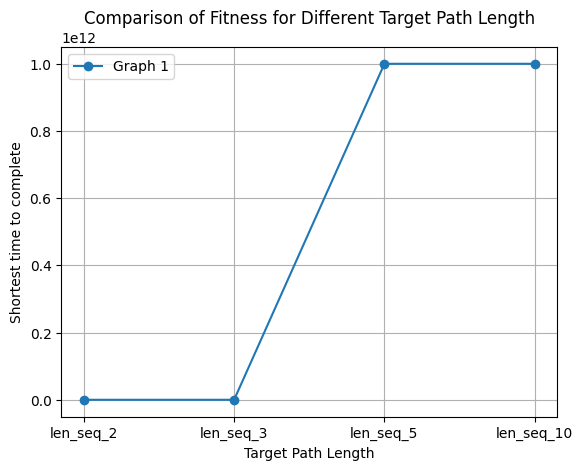

In [30]:
df = pd.read_csv("Task3/LenSeqResults.csv")

# transpose to get a function
df_transposed = df.T

for i, row in enumerate(df_transposed.columns):
    plt.plot(df_transposed.index, df_transposed[row], marker="o", label=f"Graph {i+1}")

plt.xlabel("Target Path Length")
plt.ylabel("Shortest time to complete")
plt.title("Comparison of Fitness for Different Target Path Length")
plt.grid(True)
plt.legend()

So the longer the target path, less chances we will get a solution.

3. Different mutation probability

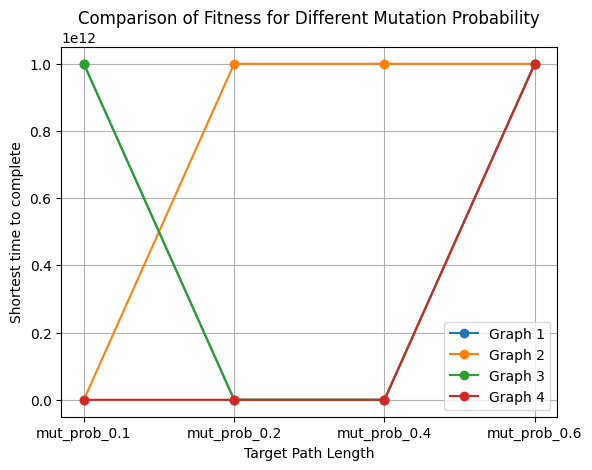

In [35]:
df = pd.read_csv("Task3/MutProbResults.csv")

# transpose to get a function
df_transposed = df.T

for i, row in enumerate(df_transposed.columns):
    plt.plot(df_transposed.index, df_transposed[row], marker="o", label=f"Graph {i+1}")

plt.xlabel("Target Path Length")
plt.ylabel("Shortest time to complete")
plt.title("Comparison of Fitness for Different Mutation Probability")
plt.grid(True)
plt.legend()

We ran this a few times, and its seems that generally, with higher mutation probability we don't get the solution we get with lower mutation probabilty